In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lifestyle=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/Sleep_health_and_lifestyle_dataset4.csv')
lifestyle.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
lifestyle.shape

(374, 13)

In [5]:
lifestyle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
lifestyle.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Numerical and Categorical variables

In [7]:
num_cols=[]
for col in lifestyle.columns:
    if (lifestyle[col].dtype != 'O'):
      num_cols.append(col)
print(num_cols,len(num_cols))       

['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'] 8


In [8]:
cat_cols=[]
for col in lifestyle.columns:
    if (lifestyle[col].dtype == 'O'):
       cat_cols.append(col)
print(cat_cols,len(cat_cols))

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'] 5


## EDA

In [9]:
for col in lifestyle.columns:
    print(col,lifestyle[col].isnull().sum())

Person ID 0
Gender 0
Age 0
Occupation 0
Sleep Duration 0
Quality of Sleep 0
Physical Activity Level 0
Stress Level 0
BMI Category 0
Blood Pressure 0
Heart Rate 0
Daily Steps 0
Sleep Disorder 219


In [10]:
lifestyle['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [11]:
lifestyle['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
lifestyle['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [13]:
lifestyle['Age'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [14]:
lifestyle['Age'].median()


43.0

In [15]:
lifestyle['Age'].mode()[0]

43

In [16]:
lifestyle['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [17]:
lifestyle['Occupation'].unique().size

11

In [18]:
lifestyle['Occupation'].value_counts() #need to give weightage or else model will be baised

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [19]:
lifestyle['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

In [20]:
lifestyle['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [21]:
lifestyle['Physical Activity Level'].unique()

array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85],
      dtype=int64)

In [22]:
lifestyle['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [23]:
lifestyle['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

## Visualization

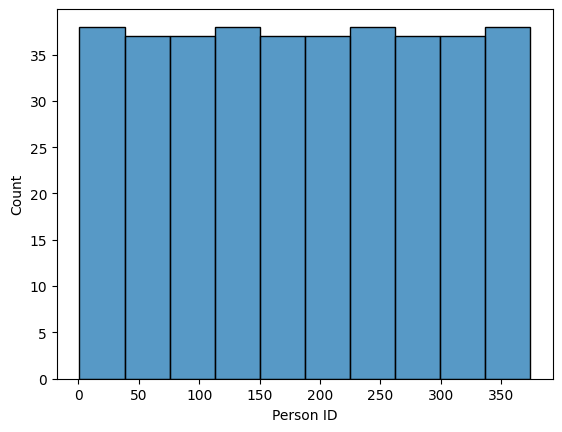

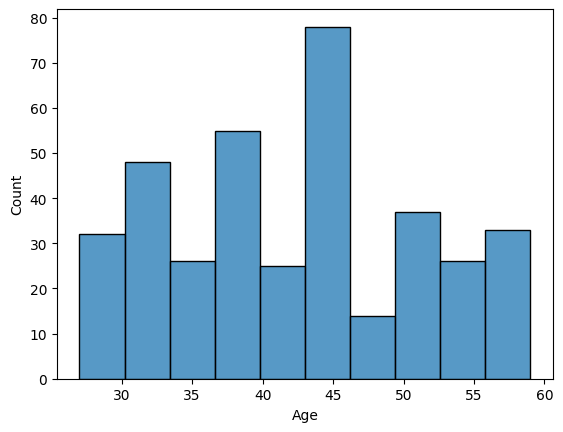

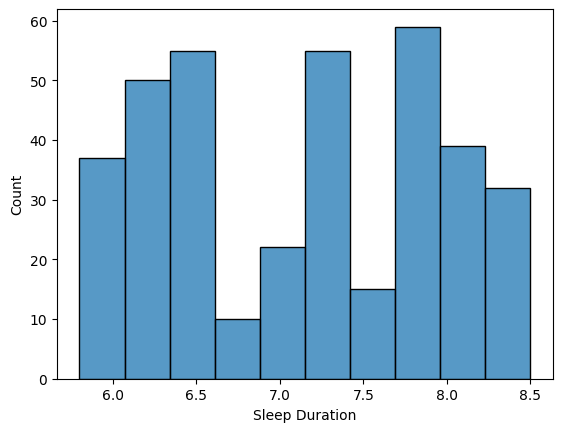

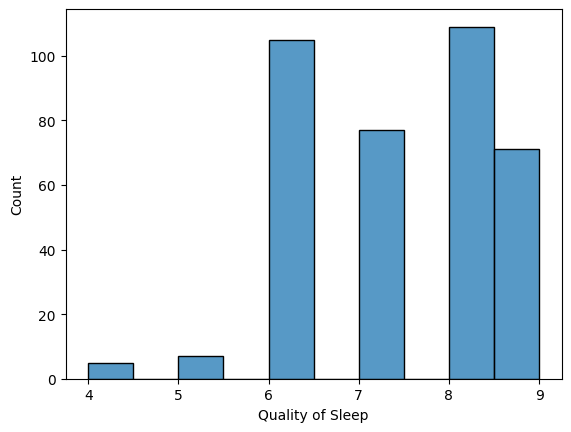

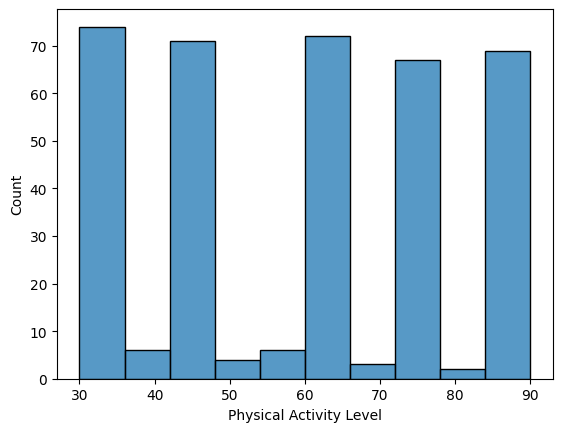

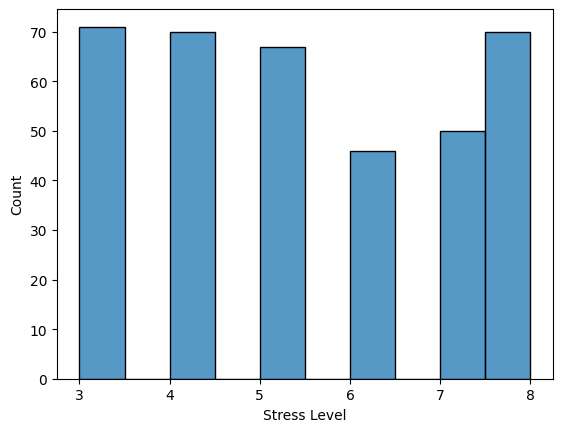

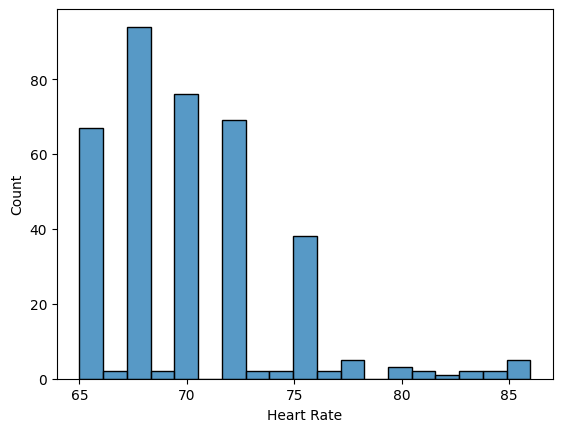

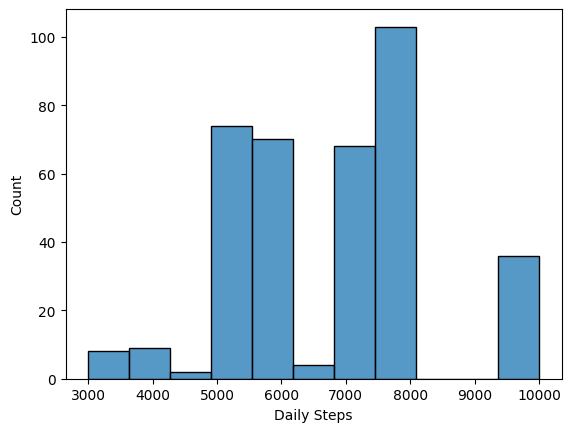

In [24]:
for index,cols in enumerate(num_cols):
    sns.histplot(x=cols,data=lifestyle)
    plt.show()

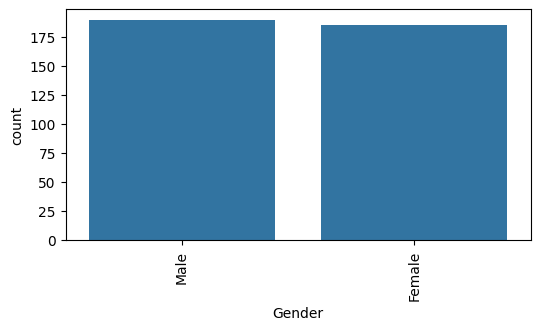

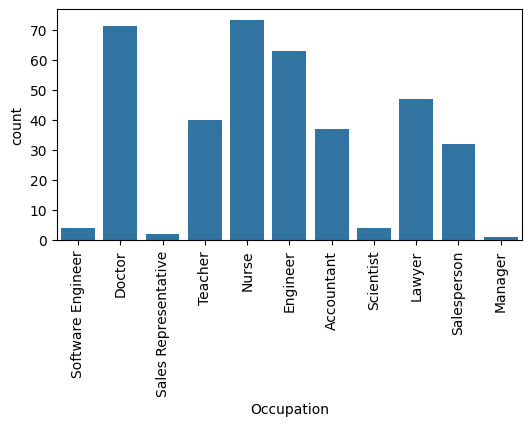

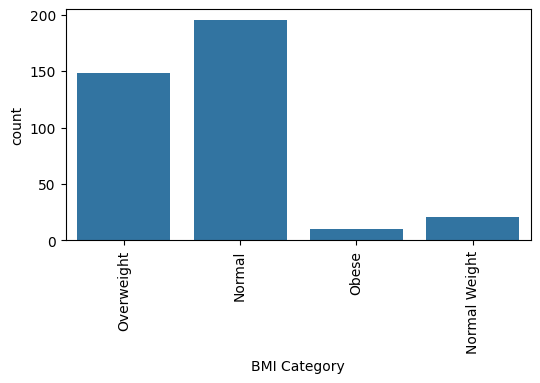

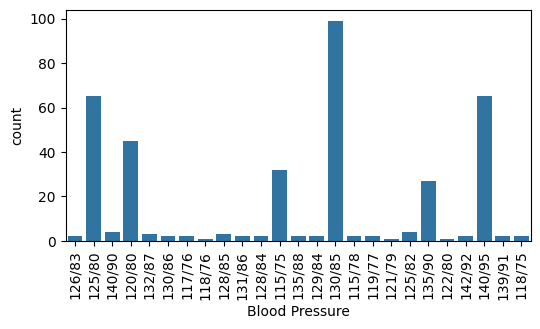

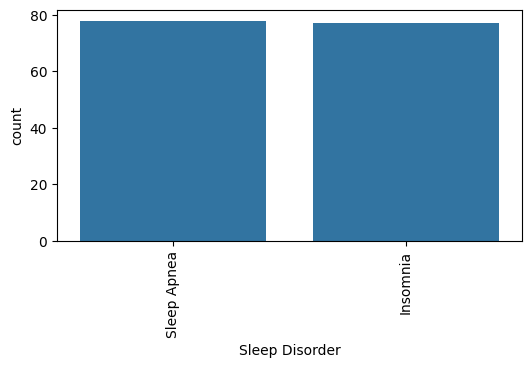

In [25]:
for cols in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=cols,data=lifestyle)
    plt.xticks(rotation=90) 
    plt.show()

## Bivariate

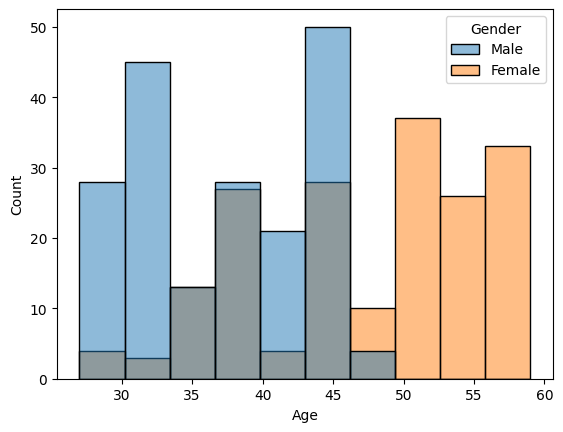

In [26]:
sns.histplot(x='Age',hue='Gender',data=lifestyle) #more old aged female and more less aged men.
plt.show()

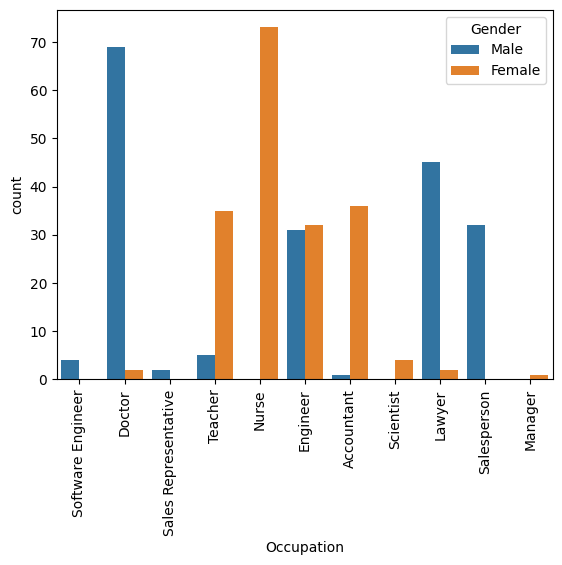

In [27]:
sns.countplot(x='Occupation',hue='Gender',data=lifestyle)
plt.xticks(rotation=90)
plt.show()

In [28]:
#nurse,accountant,teacher is dominated by females     ....# doctor,lawyer,sales by male

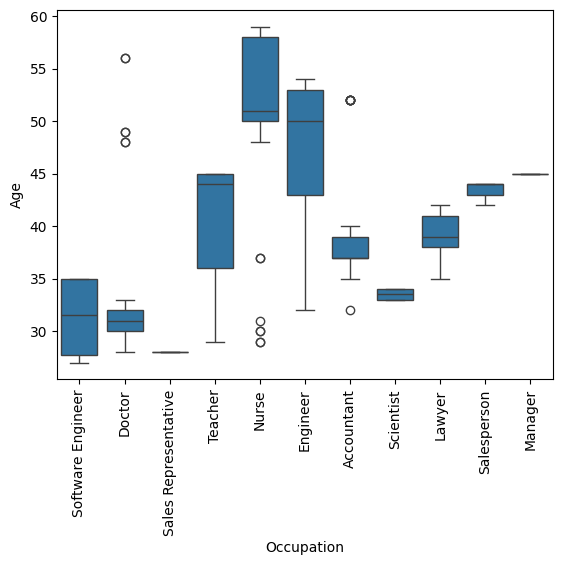

In [29]:
sns.boxplot(x='Occupation', y='Age', data=lifestyle)
plt.xticks(rotation=90)
plt.show()

In [30]:
#Nurse are very old, doctor are so young
#software engg also so many young people
#middleaged people jobs are lawyers,teachers,engg,manager

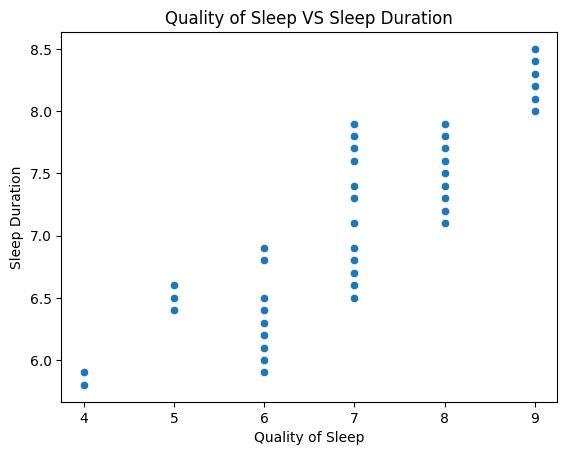

In [31]:
sns.scatterplot(x='Quality of Sleep',y='Sleep Duration',data=lifestyle)
plt.title('Quality of Sleep VS Sleep Duration')
plt.show()

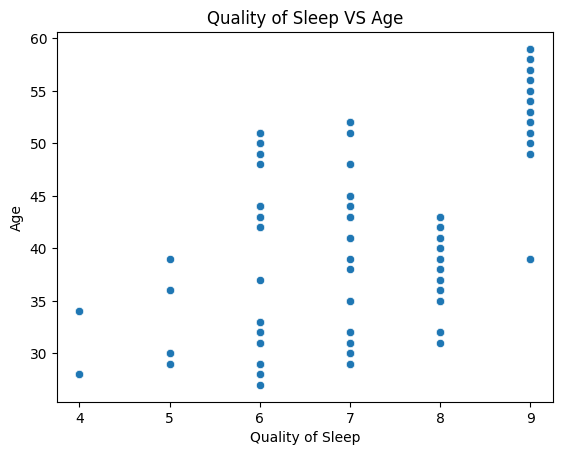

In [32]:
sns.scatterplot(x='Quality of Sleep',y='Age',data=lifestyle)
plt.title('Quality of Sleep VS Age')
plt.show()

In [33]:
# elderly people have good quality of sleep
# younger to older have quality of 6 or 7 predominately

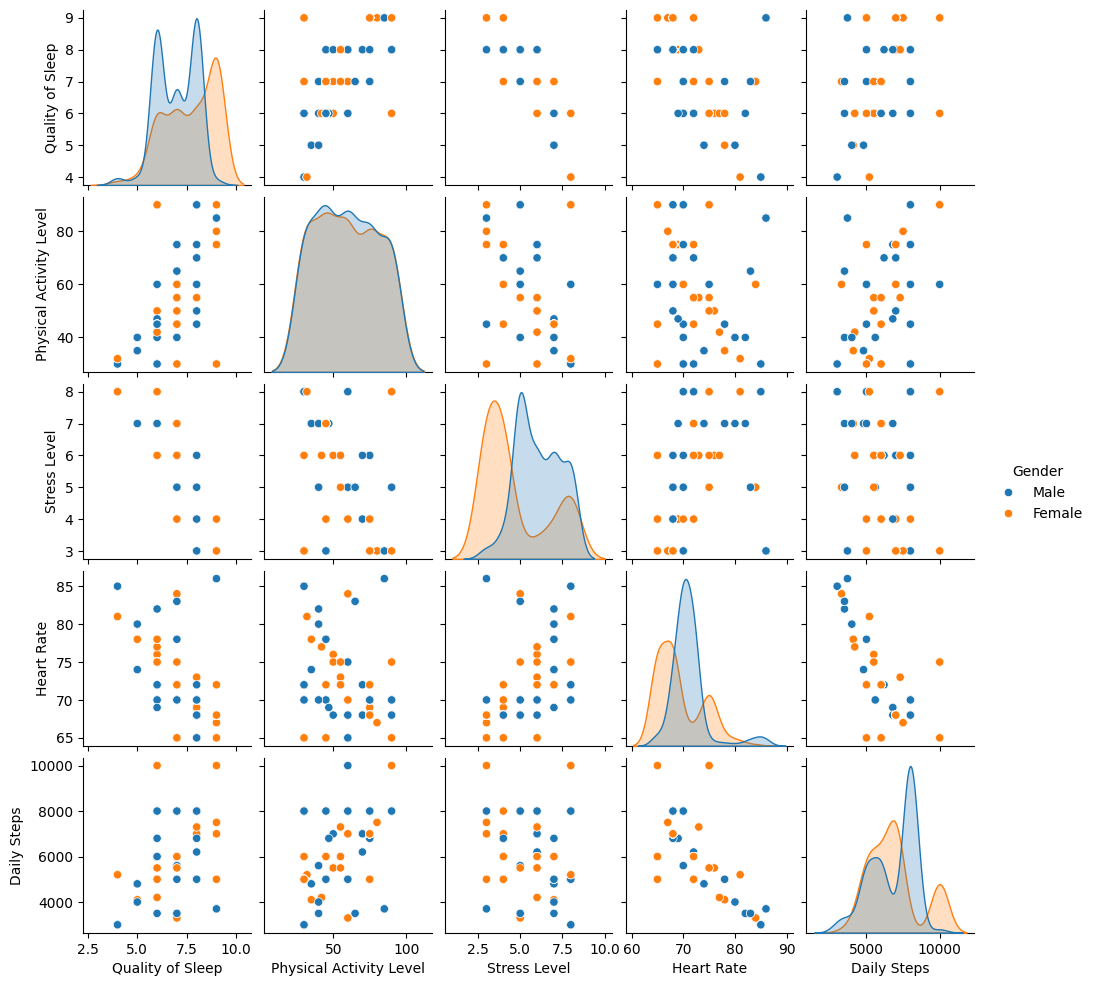

In [34]:
sns.pairplot(data=lifestyle[['Gender','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']],
              hue='Gender',diag_kind='kde',height=2)
plt.show()

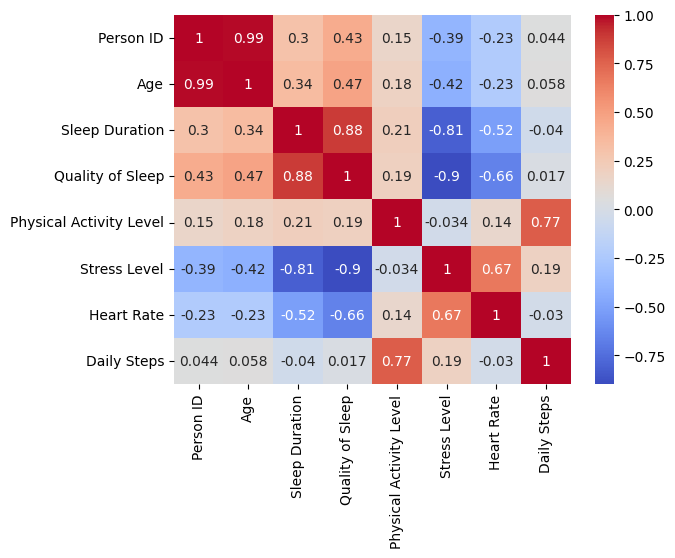

In [35]:
sns.heatmap(lifestyle[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()
            

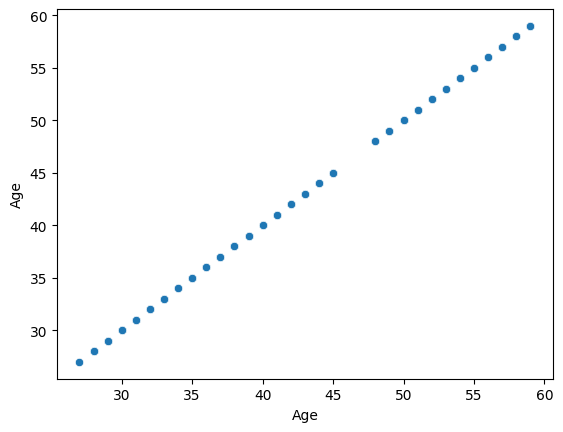

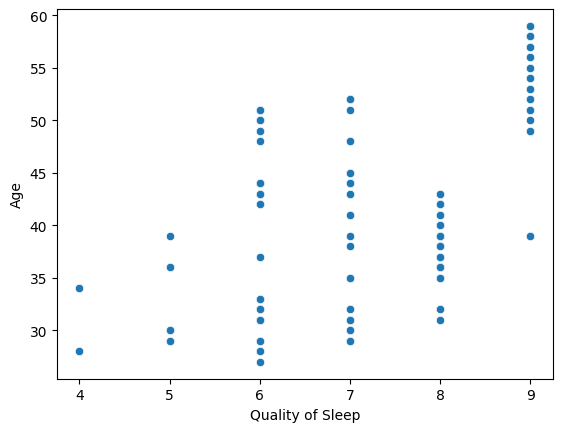

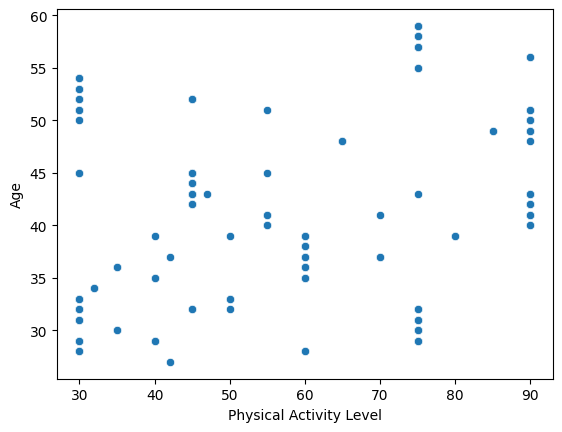

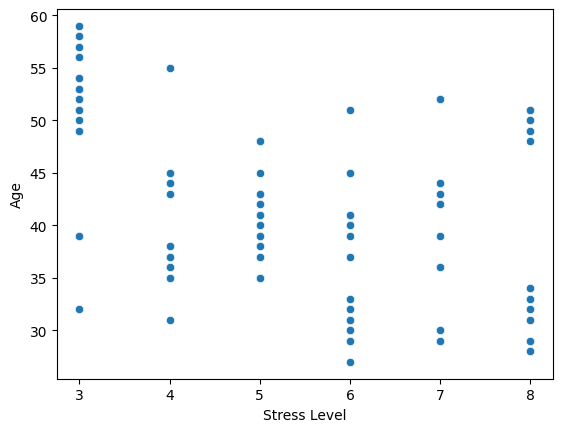

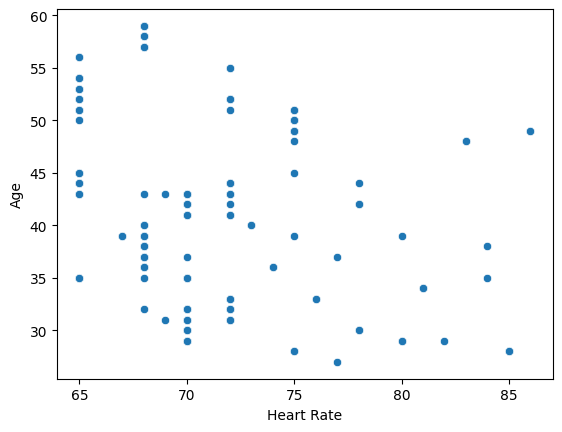

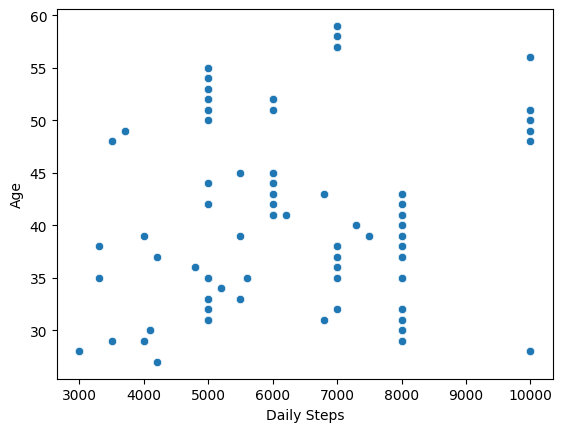

In [36]:
boxcols=['Age','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']
for col in boxcols:
   sns.scatterplot(x=col,data=lifestyle,y='Age')        
   plt.show()

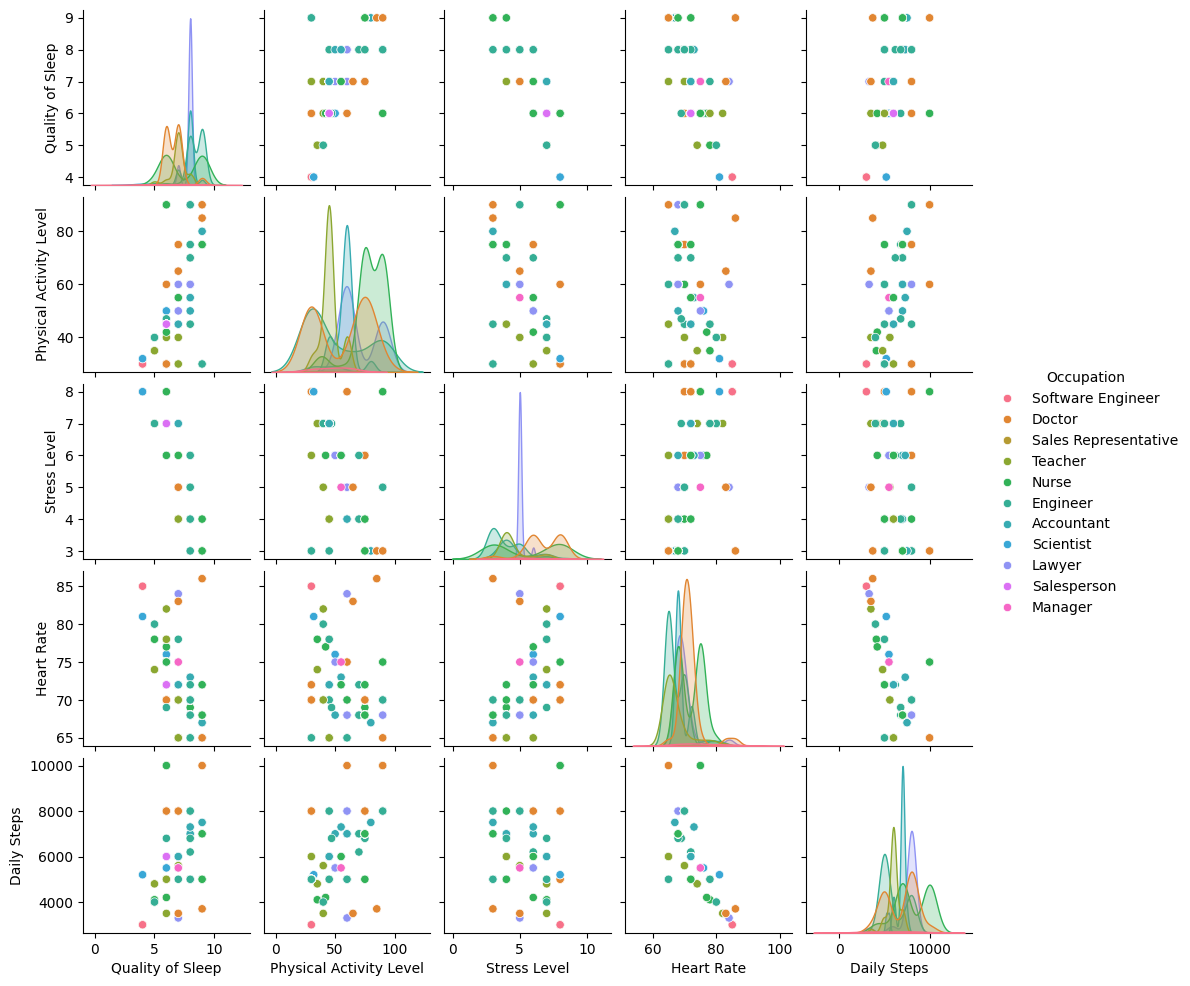

In [37]:
sns.pairplot(data=lifestyle[['Occupation','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']],
              hue='Occupation',diag_kind='kde',height=2)
plt.show()

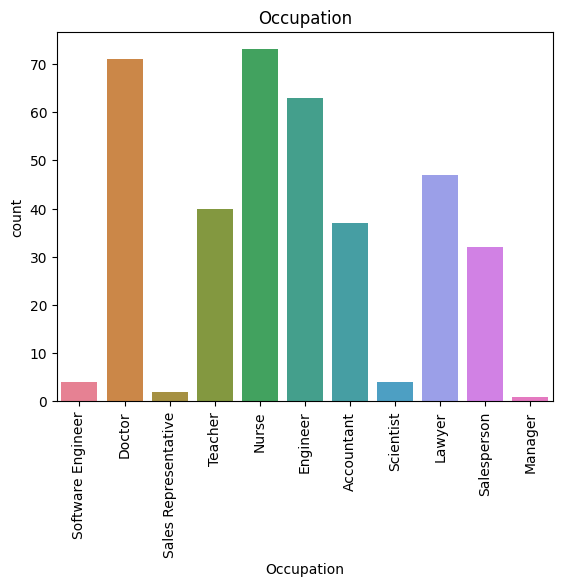

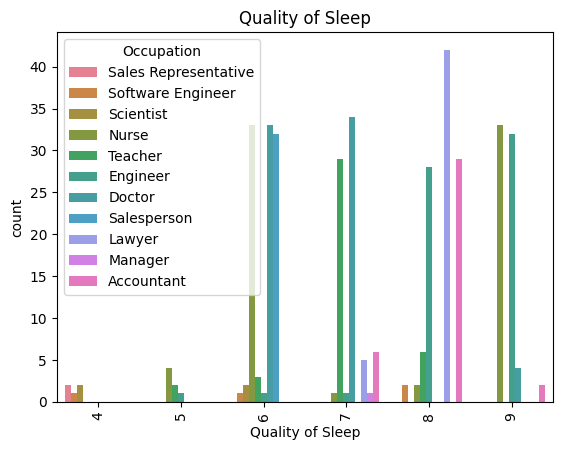

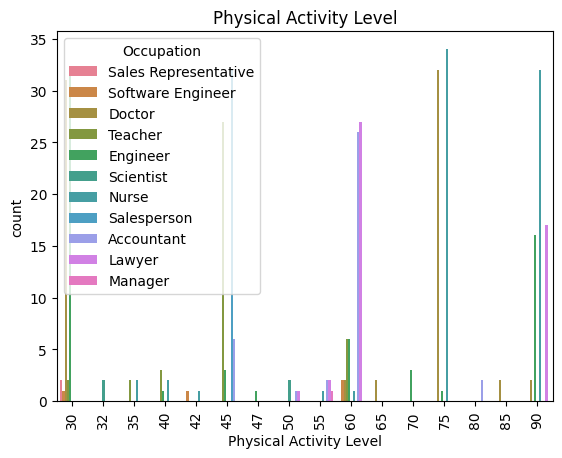

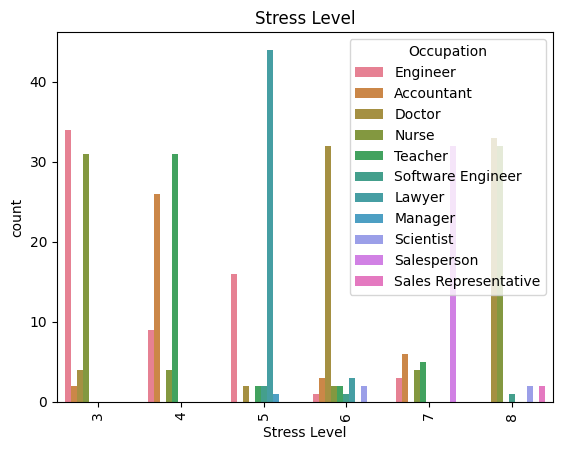

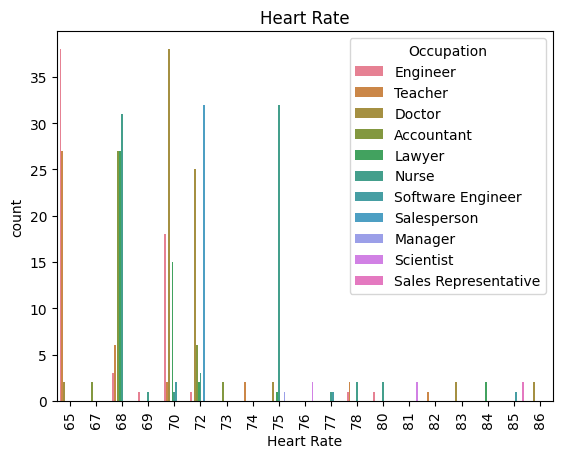

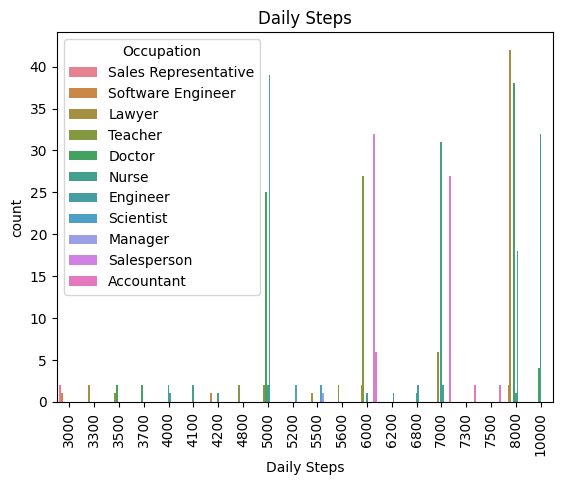

In [38]:
boxcols=['Occupation','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']
for col in boxcols:
   sns.countplot(x=col,data=lifestyle,hue='Occupation')   
   plt.title(col)
   plt.xticks(rotation=90)
   plt.show()

## Feature ENGG

In [39]:
lifestyle['BMI Category']=lifestyle['BMI Category'].replace('Obese','Overweight')
lifestyle['BMI Category']=lifestyle['BMI Category'].replace('Normal Weight','Normal')

In [40]:
lifestyle['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64

In [41]:
for index, values in lifestyle['Blood Pressure'].items():
    systolic, diastolic = values.split('/')
    systolic = int(systolic)
    diastolic = int(diastolic)
    lifestyle.loc[index, 'systolic'] = systolic
    lifestyle.loc[index, 'diastolic'] = diastolic

In [42]:
lifestyle['systolic']

0      126.0
1      125.0
2      125.0
3      140.0
4      140.0
       ...  
369    140.0
370    140.0
371    140.0
372    140.0
373    140.0
Name: systolic, Length: 374, dtype: float64

In [43]:
lifestyle.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140.0,90.0


In [44]:
lifestyle.drop(columns=['Blood Pressure','Person ID','Sleep Duration'],inplace=True)

In [45]:
lifestyle.head()

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,Male,27,Software Engineer,6,42,6,Overweight,77,4200,NaN,126.0,83.0
1,Male,28,Doctor,6,60,8,Normal,75,10000,NaN,125.0,80.0
2,Male,28,Doctor,6,60,8,Normal,75,10000,NaN,125.0,80.0
3,Male,28,Sales Representative,4,30,8,Overweight,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,4,30,8,Overweight,85,3000,Sleep Apnea,140.0,90.0


In [46]:
lifestyle['Sleep Disorder']= lifestyle['Sleep Disorder'].fillna("Unknown")

In [47]:
dic={'Male':1,'Female':0}
lifestyle['Gender']=lifestyle['Gender'].map(dic)

In [48]:
bmidic={'Overweight':1,'Normal':0}
lifestyle['BMI Category']=lifestyle['BMI Category'].map(bmidic)

In [49]:
from sklearn.preprocessing import LabelEncoder
sleepencoder=LabelEncoder()
lifestyle['Sleep Disorder']=sleepencoder.fit_transform(lifestyle['Sleep Disorder'])

In [50]:
from category_encoders import BinaryEncoder
occupationencoder = BinaryEncoder(cols=['Occupation'], drop_invariant=True).fit_transform(lifestyle)

In [51]:
lifestyle=occupationencoder

In [52]:
lifestyle['Sleep Disorder']=lifestyle['Sleep Disorder'].astype('category')
lifestyle['Sleep Disorder']=lifestyle['Sleep Disorder'].cat.codes

In [53]:
lifestyle.head()

,Gender,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,1,27,0,0,0,1,6,42,6,1,77,4200,2,126.0,83.0
1,1,28,0,0,1,0,6,60,8,0,75,10000,2,125.0,80.0
2,1,28,0,0,1,0,6,60,8,0,75,10000,2,125.0,80.0
3,1,28,0,0,1,1,4,30,8,1,85,3000,1,140.0,90.0
4,1,28,0,0,1,1,4,30,8,1,85,3000,1,140.0,90.0


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scalercols=['Quality of Sleep','Physical Activity Level','Stress Level','Age','Stress Level','Heart Rate','Daily Steps','systolic','diastolic']
for cols in scalercols:
    lifestyle[cols]=scaler.fit_transform(lifestyle[[cols]])

In [55]:
lifestyle.head()

,Gender,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,1,0.00000,0,0,0,1,0.4,0.2,0.6,1,0.571429,0.171429,2,0.407407,0.40
1,1,0.03125,0,0,1,0,0.4,0.5,1.0,0,0.476190,1.000000,2,0.370370,0.25
2,1,0.03125,0,0,1,0,0.4,0.5,1.0,0,0.476190,1.000000,2,0.370370,0.25
3,1,0.03125,0,0,1,1,0.0,0.0,1.0,1,0.952381,0.000000,1,0.925926,0.75
4,1,0.03125,0,0,1,1,0.0,0.0,1.0,1,0.952381,0.000000,1,0.925926,0.75


In [56]:
columns_needed=list(lifestyle.columns.drop('Sleep Disorder')) + ['Sleep Disorder']
lifestyle=lifestyle.reindex(columns=columns_needed)

In [57]:
X=lifestyle.iloc[:,:-1].values
y=lifestyle.iloc[:,-1].values

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.metrics import accuracy_score,classification_report

In [59]:
models={
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVM':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
}

In [60]:
for model_name,model in models.items():
    print(f"Model {model_name}...")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.3f}")
    print(classification_report(y_test,y_pred))
    print("======================================================================")

Model Logistic Regression...
Accuracy of Logistic Regression: 0.893
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.86      0.86      0.86        14
           2       0.93      0.95      0.94        41

    accuracy                           0.89        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.89      0.89      0.89        75

Model KNN...
Accuracy of KNN: 0.880
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.83      0.71      0.77        14
           2       0.91      0.95      0.93        41

    accuracy                           0.88        75
   macro avg       0.86      0.84      0.85        75
weighted avg       0.88      0.88      0.88        75

Model SVM...
Accuracy of SVM: 0.907
              precision    recall  f1-score   support

           0       0.89      0.80      0.84